# Modelos de Regresion Lineal
## Modelo con datos simulados

* y = a + b * x

* x : 100 valores distribuidos segun una N(1.5, 2.5)

* Ye : 11 + 3.0 * x + e
* e estara distribuida segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

In [4]:
res = 0 + 0.8 * np.random.rand(100) #residuos

In [5]:
y_pred = 11 + 3.0 * x

In [7]:
y_act = 11 + 3.0 * x + res

In [9]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [10]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y":y_act,
        "y_pre":y_pred_list
    }
)

In [11]:
data.head()

,x,y,y_pre
0,-0.255287,10.388788,10.234140
1,-0.175023,10.643138,10.474930
2,5.136060,26.759825,26.408179
3,-0.227523,10.847449,10.317430
4,0.226361,11.953690,11.679084


In [12]:
import matplotlib.pyplot as plt

In [45]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

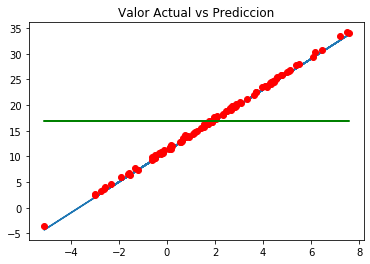

In [22]:
%matplotlib inline 
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor Actual vs Prediccion")

In [ ]:
###SSR Suma de los cuadrados de la regresion -- Explicada por el modelo
###SSD -- Error aleatorio
###SST Suma de los cuadrados totales -- Error total cometido
#R2 = SSR/SST

In [25]:
data["SSR"] = (data["y_pre"] - np.mean(y_act))**2
data["SSD"] = (data["y_pre"] - data["y"])**2
data["SST"] = (data["y"] - np.mean(y_act))**2

In [26]:
data.head()

,x,y,y_pre,SSR,SSD,SST
0,-0.255287,10.388788,10.234140,43.433705,0.023916,41.419231
1,-0.175023,10.643138,10.474930,40.317868,0.028294,38.210037
2,5.136060,26.759825,26.408179,91.845651,0.123655,98.709398
3,-0.227523,10.847449,10.317430,42.342803,0.280920,35.725911
4,0.226361,11.953690,11.679084,26.475975,0.075408,23.725424


In [27]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [28]:
SSD

19.937068709487225

In [29]:
SST

5790.523028274289

In [30]:
SSR

5801.1624003589195

In [31]:
SSR+SSD

5821.0994690684065

In [32]:
R2 = SSR / SST
R2

1.0018373766985609

(array([10.,  5.,  7., 13., 14., 11.,  8., 10., 13.,  9.]),
 array([-0.79622905, -0.71781298, -0.63939691, -0.56098084, -0.48256477,
        -0.40414871, -0.32573264, -0.24731657, -0.1689005 , -0.09048444,
        -0.01206837]),
 <a list of 10 Patch objects>)

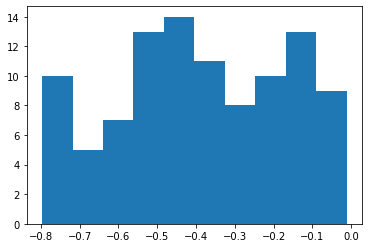

In [34]:
plt.hist((data["y_pre"] - data["y"]))

## Obteniendo la recta de regresion
* y = a + b* x
* b = sum(xi + x_m)*(y_i - y_m) / sum(xi - x_m)2
* a = y_m - b * x_m

In [47]:
x_mean = np.mean(data["x"])
y_m = np.mean(data["y"])
x_mean, y_m

(1.8124772388785046, 16.824564919613657)

In [48]:
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_m)
data["beta_d"] = (data["x"] - x_mean)**2

In [49]:
beta = sum(data["beta_n"])/ sum(data["beta_d"])

In [50]:
alpha = y_m - beta * x_mean
alpha, beta

(11.387416069339011, 2.999843933841043)

Modelo lineal obtenido por regresion es y = 11.38 + 2.99 * x

In [51]:
data["y_model"] = alpha +beta * data["x"]

In [52]:
data.head()

,x,y,y_pre,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.255287,10.388788,10.234140,43.433705,0.023916,41.419231,13.307669,4.275648,10.621596
1,-0.175023,10.643138,10.474930,40.317868,0.028294,38.210037,12.285590,3.950159,10.862373
2,5.136060,26.759825,26.408179,91.845651,0.123655,98.709398,33.020655,11.046199,26.794793
3,-0.227523,10.847449,10.317430,42.342803,0.280920,35.725911,12.193319,4.161602,10.704882
4,0.226361,11.953690,11.679084,26.475975,0.075408,23.725424,7.725773,2.515764,12.066465


In [53]:
SSR = sum ((data["y_model"] - y_m)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_m)**2)

In [54]:
SSR, SSD, SST

(5785.573186908701, 4.9498413655842555, 5790.523028274289)

In [55]:
R2 = SSR / SST
R2

0.9991451823364801

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

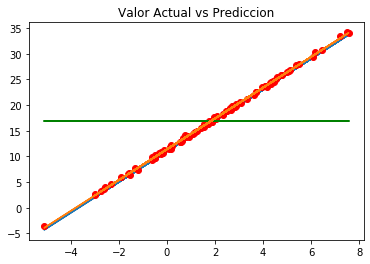

In [56]:
%matplotlib inline 
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Prediccion")

## Error estandar de los residuos (RSE)

In [61]:
SSD
RSE = np.sqrt(SSD/(len(data)-2))
#RSE

In [63]:
RSE / np.mean(data["y"])

0.01335791760361244